In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pylab as plt
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,SeparableConv2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras import layers
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from PIL import Image
import IPython.display as display

from tensorflow.keras import Model
from tensorflow.keras import optimizers

no tumor (350, 350)


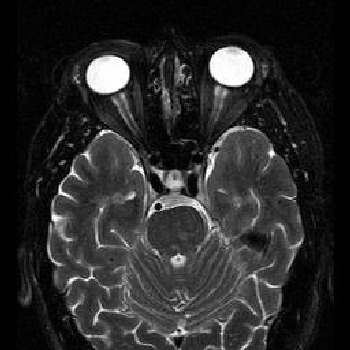

glioma tumor (350, 350)


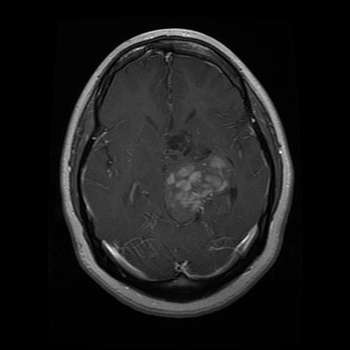

pituitary tumor (350, 350)


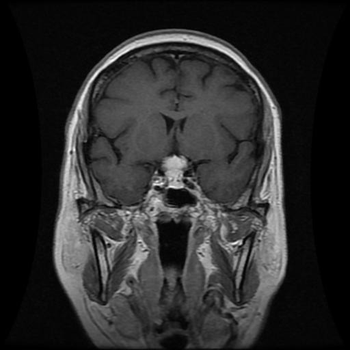

meningioma tumor (440, 278)


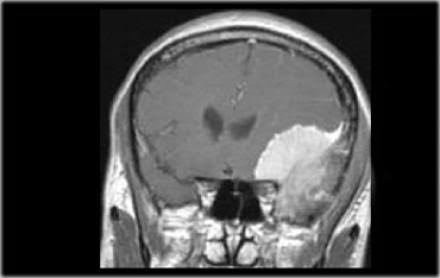

In [48]:
 #The paths is foe examples from the data

img = Image.open('/content/drive/MyDrive/project_neural_net/OUPUT_DATASET/train/no_tumor/2.jpg')
print('no tumor',img.size) # dim of image: 350x350
display.display(img)


img = Image.open('/content/drive/MyDrive/project_neural_net/OUPUT_DATASET/train/glioma_tumor/gg (1).jpg').resize((350,350),Image.ANTIALIAS)
print('glioma tumor',img.size) # dim of image: 350x350
display.display(img)

img = (Image.open('/content/drive/MyDrive/project_neural_net/OUPUT_DATASET/train/pituitary_tumor/image.jpg')).resize((350,350),Image.ANTIALIAS)
print('pituitary tumor',img.size) # dim of image: 350x350
display.display(img)

img = Image.open('//content/drive/MyDrive/project_neural_net/OUPUT_DATASET/train/meningioma_tumor/image(1).jpg')
print('meningioma tumor',img.size) # dim of image: 350x350
display.display(img)


In [49]:
#Input here the paths for the splits data:
TRAIN_PATH = "/content/drive/MyDrive/project_neural_net/OUPUT_DATASET/train"
TEST_PATH = "/content/drive/MyDrive/project_neural_net/OUPUT_DATASET/validation"
VAL_PATH = "/content/drive/MyDrive/project_neural_net/OUPUT_DATASET/test"

print(TRAIN_PATH)
print(VAL_PATH)
print(TEST_PATH)

/content/drive/MyDrive/project_neural_net/OUPUT_DATASET/train
/content/drive/MyDrive/project_neural_net/OUPUT_DATASET/test
/content/drive/MyDrive/project_neural_net/OUPUT_DATASET/validation


In [50]:
#ImageDataGenerator is a class that allows pre-processing of images,
#in order to format images before using them by training and drawing a model.
#This includes resizing, orientation and color corrections.
trainAug = ImageDataGenerator(rescale = 1./255,validation_split = 0.2,                                  
        rotation_range=5,width_shift_range=0.2,height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2,
        horizontal_flip=True,vertical_flip=True,
        fill_mode='nearest')


valAug=ImageDataGenerator(rescale=1./255, validation_split = 0.2)

testAug=ImageDataGenerator(rescale=1./255 )



In [51]:
train_dataset = trainAug.flow_from_directory(
  TRAIN_PATH, class_mode="categorical", target_size=(350,350),
  color_mode="rgb", shuffle=True, batch_size=64)

val_dataset = valAug.flow_from_directory(TEST_PATH,class_mode="categorical",
  target_size=(350,350), color_mode="rgb",shuffle=False, batch_size=64)

test_dataset = valAug.flow_from_directory(VAL_PATH, class_mode="categorical",
  target_size=(350,350),color_mode="rgb",shuffle=False,
  batch_size=64)


Found 2609 images belonging to 4 classes.
Found 328 images belonging to 4 classes.
Found 327 images belonging to 4 classes.


In [54]:
# install using python3
import scipy
image_batch_train, label_batch_train = next(iter(train_dataset))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_dataset.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print('cluster 1: ',dataset_labels[0])
print('cluster 2: ',dataset_labels[1])
print('cluster 3: ',dataset_labels[2])
print('cluster 4: ',dataset_labels[3])



Image batch shape:  (64, 350, 350, 3)
Label batch shape:  (64, 4)
cluster 1:  Glioma_Tumor
cluster 2:  Meningioma_Tumor
cluster 3:  No_Tumor
cluster 4:  Pituitary_Tumor


In [55]:
base_model_2 = tf.keras.applications.ResNet101V2(input_shape=(350,350,3),include_top=False,weights="imagenet")
# Freezing Layers
for layer in base_model_2.layers:
   layer.trainable = False

In [56]:
from tensorflow.keras import Model
from tensorflow.keras import optimizers
#The output of the CNN is also a 4D array. Where batch size would be the same as input batch size but the other 3 dimensions of the image might change depending upon the values of filter, kernel size, and padding we use.
x = base_model_2.output 

x = tf.keras.layers.Flatten()(x) 
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.4)(x) # Dropout 20 % of the layers-40%
x = tf.keras.layers.Dense(train_dataset.num_classes, activation = "softmax")(x)

#The input layer is the input of the whole CNN.
model = Model(inputs= base_model_2.input , outputs = x)


METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='acc')
]
model.compile(optimizer=optimizers.Adam(learning_rate=0.005), loss='categorical_crossentropy',metrics=METRICS)#lr=0.001,opt= "adam"

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 350, 350, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 356, 356, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 175, 175, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [57]:
history = model.fit(
      test_dataset,
      batch_size=64,
      epochs=16,
      validation_data=val_dataset,
      verbose=1)


Epoch 1/16
6/6 [==============================] - 18s 2s/step - loss: 2999.9712 - accuracy: 0.5237 - precision: 0.0346 - recall: 0.0336 - acc: 0.3501 - val_loss: 796.3818 - val_accuracy: 0.6402 - val_precision: 0.2805 - val_recall: 0.2805 - val_acc: 0.5203
Epoch 2/16
6/6 [==============================] - 9s 2s/step - loss: 138.1239 - accuracy: 0.7370 - precision: 0.4740 - recall: 0.4740 - acc: 0.6492 - val_loss: 75.5302 - val_accuracy: 0.6768 - val_precision: 0.3537 - val_recall: 0.3537 - val_acc: 0.5725
Epoch 3/16
6/6 [==============================] - 9s 2s/step - loss: 44.3099 - accuracy: 0.6636 - precision: 0.3272 - recall: 0.3272 - acc: 0.5603 - val_loss: 21.0153 - val_accuracy: 0.7645 - val_precision: 0.5291 - val_recall: 0.5274 - val_acc: 0.7006
Epoch 4/16
6/6 [==============================] - 9s 2s/step - loss: 8.8052 - accuracy: 0.8234 - precision: 0.6491 - recall: 0.6391 - acc: 0.7965 - val_loss: 14.9738 - val_accuracy: 0.7721 - val_precision: 0.5463 - val_recall: 0.5213 - 

Accuracy: 0.877



"evaluation(history)\nnp.save('/content/drive/MyDrive/project_neural_net/Model/my_history1.npy',history.history)\n\n# loading\nhistory=np.load('/content/drive/MyDrive/project_neural_net/Model/my_history1.npy',allow_pickle='TRUE').item()\n"

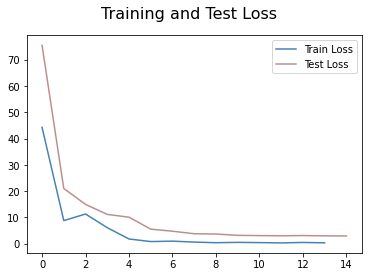

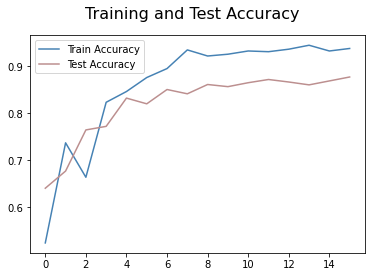

In [71]:
def evaluation(history):

  # Print accuracy
  print(('\033[1m' + 'Accuracy: ' + '\033[35m' + '{:.3f}' + '\033[44m' + '\033[0m' + '\n').format(history.history['val_accuracy'][-1]))  # The last value is the final accuracy

  # Plot training and test loss
  fig, ax = plt.subplots()
  ax.plot(history.history["loss"][2:], 'steelblue', label = "Train Loss")
  ax.plot(history.history["val_loss"][1:], 'rosybrown', label = "Test Loss")
  fig.suptitle('Training and Test Loss', fontsize=16)
  ax.legend()

  
  # Plot training and test accuracy
  fig, ax = plt.subplots()
  ax.plot(history.history['accuracy'], 'steelblue', label = "Train Accuracy")
  ax.plot(history.history['val_accuracy'],  'rosybrown', label = "Test Accuracy")
  fig.suptitle('Training and Test Accuracy', fontsize=16)
  ax.legend()

evaluation(history)

In [59]:
#INPUT here the path to the location for saving the model
#save model
model_path='/content/drive/MyDrive/project_neural_net/Model/model'
model.save(model_path)
#model.save('/content/drive/MyDrive/project_neural_net/Model/model.h5')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/project_neural_net/Model/model3/assets


In [60]:
from imutils import paths

model = keras.models.load_model(model_path)#loads the model


In [ ]:

def prepare_img(img, img_width, img_height,channels): 
    img =  tf.keras.preprocessing.image.img_to_array(img)
    img = img.reshape(1, img_width, img_height, channels).astype('float32')
    img = img / 255.0
    return img


y_pred=[]
y_test=[]

#INPUT here the location for the 4 types of the tumor from the test:
pathes=['/content/drive/MyDrive/project_neural_net/OUPUT_DATASET/test/glioma_tumor','/content/drive/MyDrive/project_neural_net/OUPUT_DATASET/test/meningioma_tumor','/content/drive/MyDrive/project_neural_net/OUPUT_DATASET/test/no_tumor','/content/drive/MyDrive/project_neural_net/OUPUT_DATASET/test/pituitary_tumor']
y=0
for p in pathes:
  for img in list(paths.list_images(p)):
    img = load_img(img ,target_size=(350, 350))
    img = prepare_img(img,350,350,3)
    predictions = model.predict(img)
    index_of_higher_value  = predictions[0].argmax()
    y_pred.append(predictions[0].argmax())
    y_test.append(y)
  y+=1



In [78]:
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred,average='weighted'))
print('Precision: ',precision_score(y_test, y_pred,average='weighted'))
print('f1 score :',f1_score(y_test,y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Accuracy:  0.9174311926605505
Recall:  0.9174311926605505
Precision:  0.9396593943580195
f1 score : 0.9211139476769717
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        93
           1       0.99      0.80      0.88        94
           2       0.67      0.98      0.80        50
           3       0.99      0.98      0.98        90

    accuracy                           0.92       327
   macro avg       0.91      0.93      0.91       327
weighted avg       0.94      0.92      0.92       327

